# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings 

In [3]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

df = pd.read_parquet('/Users/satishkumar/Desktop/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [132]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/satishkumar/Desktop/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        ppl = pd.read_parquet(file_path)

        ppl['tpep_pickup_Date'] = ppl['tpep_pickup_datetime'].dt.date
        
        ppl['tpep_pickup_Hour'] = ppl['tpep_pickup_datetime'].dt.hour

        ppl['tpep_pickup_Date']= ppl['tpep_pickup_Date'].astype(str)
        
        ppl = ppl[~(ppl['tpep_pickup_Date'].str.contains('2023-04-01','2023-02-01')| ppl['tpep_pickup_Date'].str.contains('2023-07-01') 
          |ppl['tpep_pickup_Date'].str.contains('2023-09-01')|ppl['tpep_pickup_Date'].str.contains('2023-05-01') 
          |ppl['tpep_pickup_Date'].str.contains('2023-08-01') |ppl['tpep_pickup_Date'].str.contains('2023-10-01') 
          |ppl['tpep_pickup_Date'].str.contains('2023-12-01') |ppl['tpep_pickup_Date'].str.contains('2023-02-01'))]
        
        ppl = ppl[ppl['tpep_pickup_Date'].str.contains('2023')]

        date_value = ppl['tpep_pickup_Date'].unique()

        sampled_data = pd.DataFrame()

        for p in date_value:
            xp = ppl[ppl['tpep_pickup_Date']==str(p)]
            ys = xp.sample(frac = 0.05, random_state = 42,weights = 'tpep_pickup_Hour')
            sampled_data = pd.concat([sampled_data, ys])

        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        #sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [134]:
# Store the df in csv/parquet
df.to_parquet('/Users/satishkumar/Desktop/Testing/file.parquet')


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [7]:
# Load the new data file

df= pd.read_parquet('/Users/satishkumar/Desktop/Testing/file.parquet')

In [9]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1643           2  2023-11-30 23:58:35   2023-12-01 00:11:21              1.0   
3791           2  2023-11-30 23:58:12   2023-12-01 00:06:58              1.0   
192348         1  2023-12-02 16:52:21   2023-12-02 17:09:00              1.0   
241923         1  2023-12-02 23:10:22   2023-12-02 23:32:29              1.0   
225257         1  2023-12-02 21:24:02   2023-12-02 22:02:09              3.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1643             2.14         1.0                  N           163   
3791             1.31         1.0                  N           163   
192348           3.70         1.0                  N           263   
241923           0.80         1.0                  N            48   
225257           4.40         1.0                  N           249   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1643             263             1  ...      0.5        3.70           0.0   
3791             162             1  ...      0.5        3.00           0.0   
192348           137             1  ...      0.5        0.00           0.0   
241923           230             1  ...      0.5        4.00           0.0   
225257           141             1  ...      0.5        7.75           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
1643                      1.0         22.20                   2.5   
3791                      1.0         18.00                   2.5   
192348                    1.0         21.70                   2.5   
241923                    1.0         26.70                   2.5   
225257                    1.0         46.55                   2.5   

        Airport_fee  tpep_pickup_Date  tpep_pickup_Hour airport_fee  
1643            0.0        2023-11-30                23         NaN  
3791            0.0        2023-11-30                23         NaN  
192348          0.0        2023-12-02                16         NaN  
241923          0.0        2023-12-02                23         NaN  
225257          0.0        2023-12-02                21         NaN  

[5 rows x 22 columns]

In [11]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1855720 entries, 1643 to 3206578
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [15]:
# Fix the index and drop any columns that are not needed
df.reset_index()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           1643         2  2023-11-30 23:58:35   2023-12-01 00:11:21   
1           3791         2  2023-11-30 23:58:12   2023-12-01 00:06:58   
2         192348         1  2023-12-02 16:52:21   2023-12-02 17:09:00   
3         241923         1  2023-12-02 23:10:22   2023-12-02 23:32:29   
4         225257         1  2023-12-02 21:24:02   2023-12-02 22:02:09   
...          ...       ...                  ...                   ...   
1855715  3165868         2  2023-06-30 15:36:18   2023-06-30 15:45:21   
1855716  3168879         2  2023-06-30 16:12:08   2023-06-30 16:23:32   
1855717  3129170         2  2023-06-30 08:40:00   2023-06-30 09:03:23   
1855718  3156505         2  2023-06-30 14:44:55   2023-06-30 15:49:18   
1855719  3206578         1  2023-06-30 23:18:22   2023-06-30 23:59:33   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    1.0           2.14         1.0                  N   
1                    1.0           1.31         1.0                  N   
2                    1.0           3.70         1.0                  N   
3                    1.0           0.80         1.0                  N   
4                    3.0           4.40         1.0                  N   
...                  ...            ...         ...                ...   
1855715              1.0           0.78         1.0                  N   
1855716              3.0           1.26         1.0                  N   
1855717              1.0           3.35         1.0                  N   
1855718              1.0          16.67         3.0                  N   
1855719              1.0           7.50         1.0                  N   

         PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0                 163           263  ...      0.5        3.70           0.0   
1                 163           162  ...      0.5        3.00           0.0   
2                 263           137  ...      0.5        0.00           0.0   
3                  48           230  ...      0.5        4.00           0.0   
4                 249           141  ...      0.5        7.75           0.0   
...               ...           ...  ...      ...         ...           ...   
1855715           230           186  ...      0.5        2.66           0.0   
1855716            48            90  ...      0.5        3.72           0.0   
1855717           249           237  ...      0.5        3.00           0.0   
1855718           164             1  ...      0.0       24.12          21.0   
1855719            79           238  ...      0.5        9.30           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         22.20                   2.5   
1                          1.0         18.00                   2.5   
2                          1.0         21.70                   2.5   
3                          1.0         26.70                   2.5   
4                          1.0         46.55                   2.5   
...                        ...           ...                   ...   
1855715                    1.0         15.96                   2.5   
1855716                    1.0         22.32                   2.5   
1855717                    1.0         29.60                   2.5   
1855718                    1.0        144.72                   0.0   
1855719                    1.0         55.80                   2.5   

         Airport_fee  tpep_pickup_Date  tpep_pickup_Hour  airport_fee  
0                0.0        2023-11-30                23          NaN  
1                0.0        2023-11-30                23          NaN  
2                0.0        2023-12-02                16          NaN  
3                0.0        2023-12-02                23          NaN  
4                0.0        2023-12-02                21          NaN  
...              ...   

In [16]:
df = df.drop('tpep_pickup_Hour',axis = 1)
df = df.drop('tpep_pickup_Date',axis = 1)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [20]:
# Combine the two airport fee columns

df['Air_fee'] = df[['Airport_fee', 'airport_fee']].sum(axis=1)

df['Air_fee'].value_counts()


Air_fee
 0.00    1689284
 1.75     124936
 1.25      41486
-1.75         10
-1.25          4
Name: count, dtype: int64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [23]:
# check where values of fare amount are negative

df[df['fare_amount']<0].head()


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, airport_fee, Air_fee]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [26]:
# Analyse RatecodeID for the negative fare amounts

df[df['RatecodeID']<0].head()

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, airport_fee, Air_fee]
Index: []

[0 rows x 21 columns]

In [28]:
# Find which columns have negative values

#df.info()
#df[df['extra']<0].head()
#df[df['mta_tax']<0].head()
#df[df['improvement_surcharge']<0].head()
#df[df['total_amount']<0].head()
#df[df['congestion_surcharge']<0].head()
#df[df['Air_fee']<0].head()

In [30]:
df[df['Air_fee']<0].head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1142772         2  2023-12-10 16:58:21   2023-12-10 16:58:31              1.0   
1459305         2  2023-12-13 15:34:22   2023-12-13 15:45:08              1.0   
2370195         2  2023-12-21 12:07:06   2023-12-21 13:07:13              3.0   
1155166         2  2023-04-12 14:56:55   2023-04-12 15:26:00              1.0   
1638635         2  2023-04-16 17:07:34   2023-04-16 17:45:50              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1142772           0.00         1.0                  N           163   
1459305           4.36         1.0                  N           132   
2370195          17.06         2.0                  N           132   
1155166           8.53         1.0                  N           138   
1638635          13.66         1.0                  N           132   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
1142772           163             2  ...    0.0     -0.5         0.0   
1459305           216             2  ...    0.0     -0.5         0.0   
2370195           162             2  ...    0.0     -0.5         0.0   
1155166           237             2  ...    0.0     -0.5         0.0   
1638635            37             2  ...    0.0     -0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
1142772           0.0                   -1.0         -5.75   
1459305           0.0                   -1.0         -3.25   
2370195           0.0                   -1.0         -5.75   
1155166           0.0                   -1.0         -5.75   
1638635           0.0                   -1.0         -3.25   

         congestion_surcharge  Airport_fee  airport_fee  Air_fee  
1142772                  -2.5        -1.75          NaN    -1.75  
1459305                   0.0        -1.75          NaN    -1.75  
2370195                  -2.5        -1.75          NaN    -1.75  
1155166                  -2.5        -1.75          NaN    -1.75  
1638635                   0.0        -1.75          NaN    -1.75  

[5 rows x 21 columns]

In [32]:
# fix these negative values
df['extra'] = df['extra'].where(df['extra']<0,0)
df['mta_tax'] = df['mta_tax'].where(df['mta_tax']<0,0)
df['improvement_surcharge'] = df['improvement_surcharge'].where(df['improvement_surcharge']<0,0)
df['total_amount'].loc[df['total_amount'] < 0] = 0
df['congestion_surcharge'].loc[df['congestion_surcharge'] < 0] = 0
df['Air_fee'] = df['Air_fee'].where(df['Air_fee']<0,0)



/var/folders/f2/nhm06d1x0rj9gb0_43b6bnsc0000gn/T/ipykernel_15429/3797030945.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['total_amount'].loc[df['total_amount'] < 0] = 0
/var/folders/f2/nhm06d1x0rj9gb0_43b6bnsc0000gn/T/ipykernel_154

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [36]:
# Find the proportion of missing values in each column

df.isnull().mean() * 100

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.236264
trip_distance             0.000000
RatecodeID                3.236264
store_and_fwd_flag        3.236264
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.236264
Airport_fee              11.260912
airport_fee              91.975352
Air_fee                   0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [39]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df['passenger_count'].isnull()==1]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3202887         2  2023-12-02 16:08:49   2023-12-02 16:25:21              NaN   
3202755         1  2023-12-02 15:45:55   2023-12-02 15:58:26              NaN   
3203195         2  2023-12-02 18:07:38   2023-12-02 18:29:30              NaN   
3203237         1  2023-12-02 18:10:56   2023-12-02 18:30:22              NaN   
3202862         1  2023-12-02 16:45:44   2023-12-02 17:10:17              NaN   
...           ...                  ...                   ...              ...   
3306976         2  2023-06-30 22:16:24   2023-06-30 22:38:54              NaN   
3306887         1  2023-06-30 21:59:54   2023-06-30 22:04:40              NaN   
3306509         2  2023-06-30 18:56:03   2023-06-30 19:09:28              NaN   
3306362         2  2023-06-30 17:24:00   2023-06-30 18:09:00              NaN   
3306743         1  2023-06-30 20:26:33   2023-06-30 20:34:35              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3202887           2.46         NaN               None            24   
3202755           0.60         NaN               None           186   
3203195           4.73         NaN               None           141   
3203237           0.80         NaN               None           161   
3202862           1.90         NaN               None           141   
...                ...         ...                ...           ...   
3306976           2.12         NaN               None           239   
3306887           0.80         NaN               None           230   
3306509           1.48         NaN               None           186   
3306362           9.29         NaN               None           140   
3306743           0.00         NaN               None           186   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
3202887           263             0  ...    0.0      0.0        4.21   
3202755           246             0  ...    0.0      0.0        2.20   
3203195            79             0  ...    0.0      0.0        6.37   
3203237           170             0  ...    0.0      0.0        4.06   
3202862           143             0  ...    0.0      0.0        3.78   
...               ...           ...  ...    ...      ...         ...   
3306976           230             0  ...    0.0      0.0        4.50   
3306887            50             0  ...    0.0      0.0        1.15   
3306509           233             0  ...    0.0      0.0        5.00   
3306362            61             0  ...    0.0      0.0        0.00   
3306743           246             0  ...    0.0      0.0        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
3202887           0.0                    0.0         25.26   
3202755           0.0                    0.0         16.90   
3203195           0.0                    0.0         38.24   
3203237           0.0                    0.0         24.36   
3202862           0.0                    0.0         28.98   
...               ...                    ...           ...   
3306976           0.0                    0.0         27.01   
3306887           0.0                    0.0         12.65   
3306509           0.0                    0.0         22.89   
3306362           0.0                    0.0         55.85   
3306743           0.0                    0.0         14.44   

         congestion_surcharge  Airport_fee  airport_fee  Air_fee  
3202887                   NaN          NaN          NaN      0.0  
3202755                   NaN          NaN          NaN      0.0  
3203195                   NaN          NaN          NaN      0.0  
3203237                   NaN          NaN          NaN      0.0  
3202862                   NaN          NaN          NaN      0.0  
...                       ...          ...          ...      ...  
3306976                   NaN          NaN          NaN      0.0  
3306887                   NaN        

In [41]:
pt = df[df['passenger_count'].isnull()==1]

pt['payment_type'].value_counts()

#as Payment type is 0 which is not a Valid payment type these records can be removed.

payment_type
0    60056
Name: count, dtype: int64

In [43]:
df = df[~(df['passenger_count'].isnull()==1)]

Did you find zeroes in passenger_count? Handle these.

In [46]:
#df = df[~(df['passenger_count']==0)]
df['passenger_count'].value_counts()

passenger_count
1.0    1338734
2.0     281372
3.0      69472
4.0      39402
0.0      28176
5.0      23478
6.0      15005
8.0         12
7.0          7
9.0          6
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [49]:
# Fix missing values in 'RatecodeID'

df[(df['RatecodeID'].isnull()==1)]

df['RatecodeID'].value_counts()



RatecodeID
1.0     1696943
2.0       72364
5.0        9334
99.0       8135
3.0        5224
4.0        3661
6.0           3
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [52]:
# handle null values in congestion_surcharge

#df['congestion_surcharge'].loc[df['congestion_surcharge'] < 0] = 0
df['congestion_surcharge'].value_counts()

#df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)




congestion_surcharge
2.50    1661173
0.00     134489
1.00          1
0.75          1
Name: count, dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [55]:
# Handle any remaining missing values

df.isnull().sum()
#we can ignore Airport_fee and airport_fee as its merged

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge           0
Airport_fee               148915
airport_fee              1646749
Air_fee                        0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [59]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.795664e+06                     1795664                     1795664   
mean   1.743109e+00  2023-07-01 19:47:55.453456  2023-07-01 20:05:25.564758   
min    1.000000e+00         2023-01-01 01:04:22         2023-01-01 01:09:09   
25%    1.000000e+00  2023-03-31 23:05:20.250000  2023-03-31 23:21:55.750000   
50%    2.000000e+00         2023-06-25 11:53:54         2023-06-25 12:08:59   
75%    2.000000e+00         2023-10-06 15:50:16  2023-10-06 16:14:53.500000   
max    2.000000e+00         2023-12-31 23:59:51         2024-01-01 21:34:04   
std    4.369189e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.795664e+06   1.795664e+06  1.795664e+06  1.795664e+06   
mean      1.378388e+00   3.573181e+00  1.517010e+00  1.656467e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.060000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.360000e+00  1.000000e+00  2.330000e+02   
max       9.000000e+00   3.242370e+04  9.900000e+01  2.650000e+02   
std       8.945587e-01   3.915062e+01  6.587547e+00  6.317053e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.795664e+06  1.795664e+06  1.795664e+06  1.795664e+06  1.795664e+06   
mean   1.650195e+02  1.201017e+00  1.980224e+01 -2.227588e-06 -2.311123e-05   
min    1.000000e+00  1.000000e+00  0.000000e+00 -2.500000e+00 -5.000000e-01   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  0.000000e+00   
50%    1.620000e+02  1.000000e+00  1.350000e+01  0.000000e+00  0.000000e+00   
75%    2.340000e+02  1.000000e+00  2.190000e+01  0.000000e+00  0.000000e+00   
max    2.650000e+02  4.000000e+00  7.000000e+02  0.000000e+00  0.000000e+00   
std    6.992168e+01  4.623269e-01  1.833688e+01  2.175689e-03  3.399277e-03   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.795664e+06  1.795664e+06           1.795664e+06  1.795664e+06   
mean   3.627483e+00  5.917124e-01          -4.900694e-05  2.910981e+01   
min    0.000000e+00  0.000000e+00          -1.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           0.000000e+00  1.610000e+01   
50%    2.940000e+00  0.000000e+00           0.000000e+00  2.130000e+01   
75%    4.500000e+00  0.000000e+00           0.000000e+00  3.100000e+01   
max    4.805000e+02  1.027500e+02           0.000000e+00  7.079400e+02   
std    4.071163e+00  2.156100e+00           7.000326e-03  2.295060e+01   

       congestion_surcharge   Airport_fee    airport_fee       Air_fee  
count          1.795664e+06  1.646749e+06  148915.000000  1.795664e+06  
mean           2.312757e+00  1.537381e-01       0.116207 -1.253018e-05  
min            0.000000e+00 -1.750000e+00       0.000000 -1.750000e+00  
25%            2.500000e+00  0.000000e+00       0.000000  0.000000e+00  
50%            2.500000e+00  0.000000e+00       0.000000  0.000000e+00  
75%            2.500000e+00  0.000000e+00       0.000000  0.000000e+00  
max            2.500000e+00  1.750000e+00       1.250000  0.000000e+00  
std            6.580627e-01  4.847283e-01       0.362982  4.531604e-03

In [61]:
def find_outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [66]:
# remove passenger_count > 6
df = df[~(df['passenger_count']>6)]

In [68]:
# Continue with outlier handling

#pt =df[(df['trip_distance']<1) & (df['fare_amount']>300) ]
#pt[['trip_distance','fare_amount','']]

#pt = df[df['trip_distance']>250]
#pt[['trip_distance','fare_amount']]

pt = df[df['payment_type']==0]
pt

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, airport_fee, Air_fee]
Index: []

[0 rows x 21 columns]

In [70]:
#removing values whose trip_distance is 0 and fare is more than 300
df = df[~((df['trip_distance']==0) & (df['fare_amount']>300)) ]

In [72]:
df = df[~(df['trip_distance']>250)]

In [74]:
# Do any columns need standardising?

#Not required at this stage of data handling

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1795585 entries, 1643 to 3206578
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [77]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'airport_fee',
 'Air_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Numerical
* `tpep_pickup_datetime`:Numerical
* `tpep_dropoff_datetime`:Numerical
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Numerical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Numerical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`:numerical
* `extra`:numerical
* `mta_tax` :numerical
* `tip_amount` :numerical
* `tolls_amount` :numerical
* `improvement_surcharge` :numerical
* `total_amount` :numerical
* `congestion_surcharge` :numerical
* `airport_fee` :numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

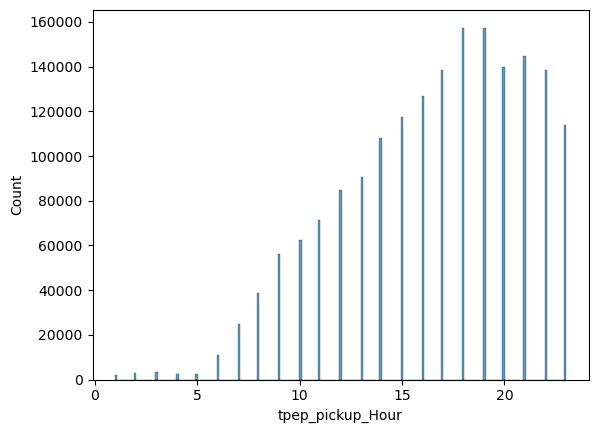

In [83]:
# Find and show the hourly trends in taxi pickups

df['tpep_pickup_Hour'] = df['tpep_pickup_datetime'].dt.hour
#df.head()
sns.histplot(data = df['tpep_pickup_Hour'])
plt.show()

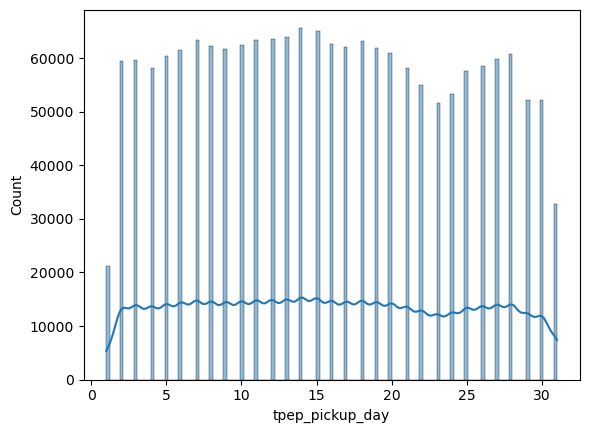

In [85]:
# Find and show the daily trends in taxi pickups (days of the week)

df['tpep_pickup_day'] = df['tpep_pickup_datetime'].dt.day
sns.histplot(data = df['tpep_pickup_day'],kde = True)
plt.show()

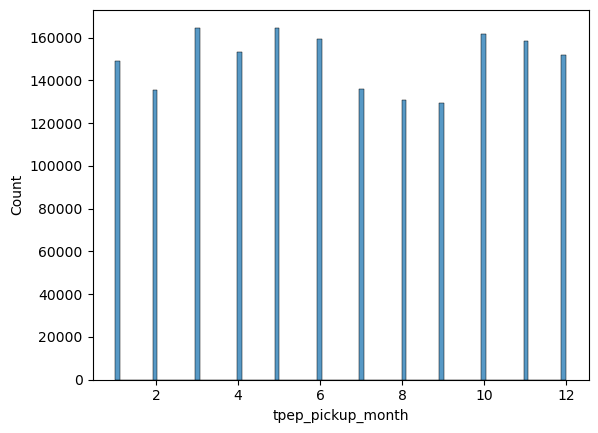

In [87]:
# Show the monthly trends in pickups

df['tpep_pickup_month'] = df['tpep_pickup_datetime'].dt.month
sns.histplot(data = df['tpep_pickup_month'])
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [91]:
# Analyse the above parameters

#df[df['fare_amount']<0]
#df[df['tip_amount']<0]
df[df['total_amount']==0]
#df[df['trip_distance']<0]

###Total Amount has Negative values and rest all contain 0 values

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
212872          2  2023-12-02 18:57:42   2023-12-03 18:35:29              1.0   
509022          1  2023-12-05 16:23:28   2023-12-05 16:33:03              1.0   
857743          1  2023-12-08 11:02:53   2023-12-08 11:03:06              1.0   
926531          2  2023-12-08 21:45:27   2023-12-08 21:50:27              1.0   
1142772         2  2023-12-10 16:58:21   2023-12-10 16:58:31              1.0   
...           ...                  ...                   ...              ...   
2925177         2  2023-06-28 08:17:23   2023-06-28 08:17:48              1.0   
3001136         1  2023-06-28 21:29:09   2023-06-28 21:32:08              1.0   
3000580         1  2023-06-28 21:42:19   2023-06-28 21:42:50              1.0   
3083506         1  2023-06-29 18:56:59   2023-06-29 18:56:59              1.0   
3026494         1  2023-06-29 08:21:33   2023-06-29 09:15:17              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
212872            3.64         1.0                  N           262   
509022            1.50         1.0                  N           142   
857743            0.00        99.0                  N           112   
926531            0.96         2.0                  N           142   
1142772           0.00         1.0                  N           163   
...                ...         ...                ...           ...   
2925177           0.00         1.0                  N           193   
3001136           0.00         1.0                  N           246   
3000580           0.00         2.0                  N           132   
3083506           0.00         5.0                  N           265   
3026494           9.00         1.0                  N           138   

         DOLocationID  payment_type  ...  tolls_amount  improvement_surcharge  \
212872            107             2  ...           0.0                   -1.0   
509022            237             4  ...           0.0                    0.0   
857743            112             1  ...           0.0                    0.0   
926531            239             2  ...           0.0                   -1.0   
1142772           163             2  ...           0.0                   -1.0   
...               ...           ...  ...           ...                    ...   
2925177           193             1  ...           0.0                    0.0   
3001136            90             1  ...           0.0                    0.0   
3000580           132             3  ...           0.0                    0.0   
3083506           264             2  ...           0.0                    0.0   
3026494           232             3  ...           0.0                    0.0   

         total_amount  congestion_surcharge  Airport_fee  airport_fee  \
212872            0.0                   0.0         0.00          NaN   
509022            0.0                   0.0         0.00          NaN   
857743            0.0                   0.0         0.00          NaN   
926531            0.0                   0.0         0.00          NaN   
1142772           0.0                   0.0        -1.75          NaN   
...               ...                   ...          ...          ...   
2925177           0.0                   0.0         0.00          NaN   
3001136           0.0                   0.0         0.00          NaN   
3000580           0.0                   0.0         0.00          NaN   
3083506           0.0                   0.0         0.00          NaN   
3026494           0.0                   0.0         0.00          NaN   

         Air_fee  tpep_pickup_Hour  tpep_pickup_day  tpep_pickup_month  
212872      0.00                18                2                 12  
509022      0.00                16                5                 12  
857743      0.00                11                8                 12  
926531      0.00                21       

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [95]:
# Create a df with non zero entries for the selected parameters.

df = df[~((df['PULocationID']==df['DOLocationID']) & (df['trip_distance']==0))]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [98]:
# Group data by month and analyse monthly revenue

df.groupby('tpep_pickup_month')['total_amount'].sum()

#df['total_amount'].sum()

tpep_pickup_month
1     4070488.68
2     3690296.75
3     4639287.18
4     4398181.91
5     4819795.39
6     4649569.49
7     3934128.84
8     3822765.99
9     3911655.99
10    4795438.40
11    4602954.89
12    4412898.90
Name: total_amount, dtype: float64

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [101]:
# Calculate proportion of each quarter

df['tpep_pickup_quarter'] = df['tpep_pickup_datetime'].dt.quarter
df.groupby('tpep_pickup_quarter')['total_amount'].sum()

tpep_pickup_quarter
1    12400072.61
2    13867546.79
3    11668550.82
4    13811292.19
Name: total_amount, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

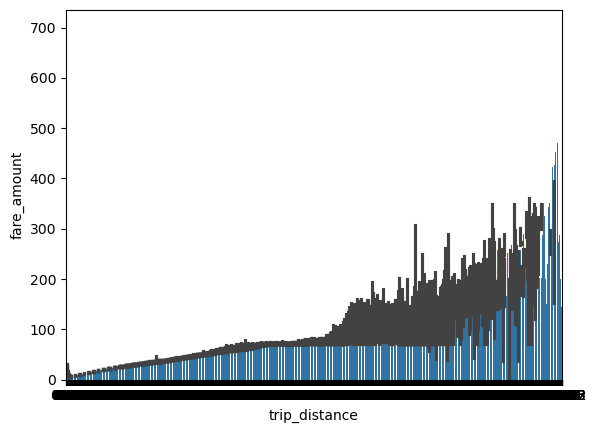

In [104]:
# Show how trip fare is affected by distance

#plt.bar(df['trip_distance'],df['fare_amount'])
lt = df[~(df['trip_distance']==0)]
sns.barplot(x = lt['trip_distance'], y = lt['fare_amount'])
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

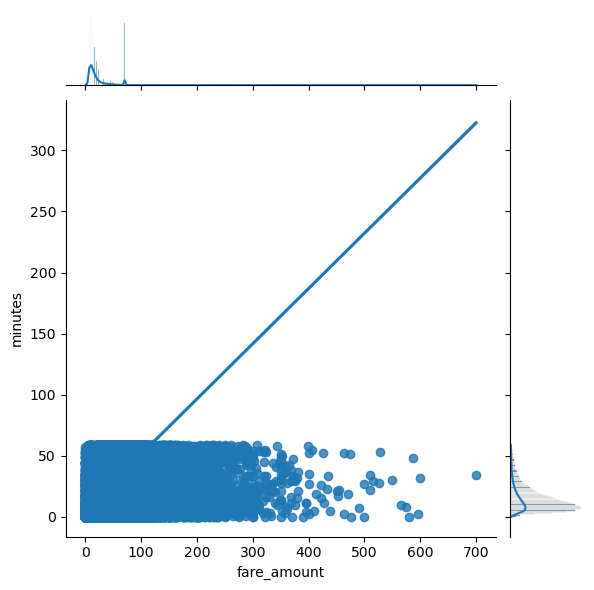

In [563]:
# Show relationship between fare and trip duration
#df['tpep_pickup_min'] = df['tpep_pickup_datetime'].dt.minute
#df['tpep_drop_min'] = df['tpep_dropoff_datetime'].dt.minute

#df['time_diff']= df['tpep_dropoff_datetime']- df['tpep_pickup_datetime']
sns.jointplot(x = df['fare_amount'], y = df['time_diff'].dt.components.minutes,kind = "reg")
plt.show()

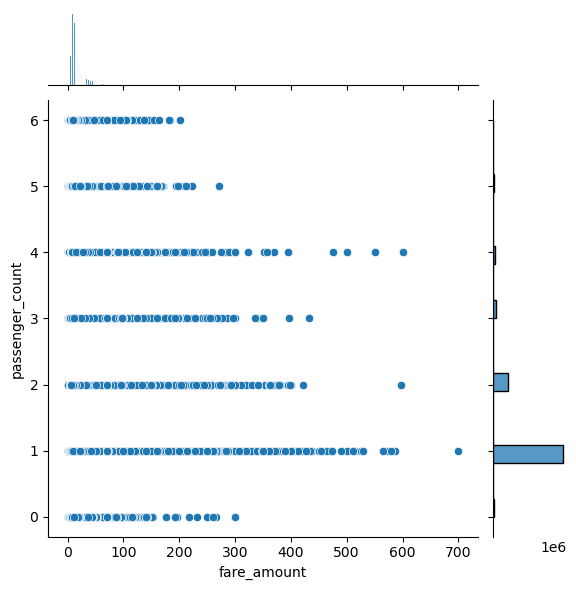

In [365]:
# Show relationship between fare and number of passengers

sns.jointplot(x = df['fare_amount'], y = df['passenger_count'],kind = "scatter")
plt.show()

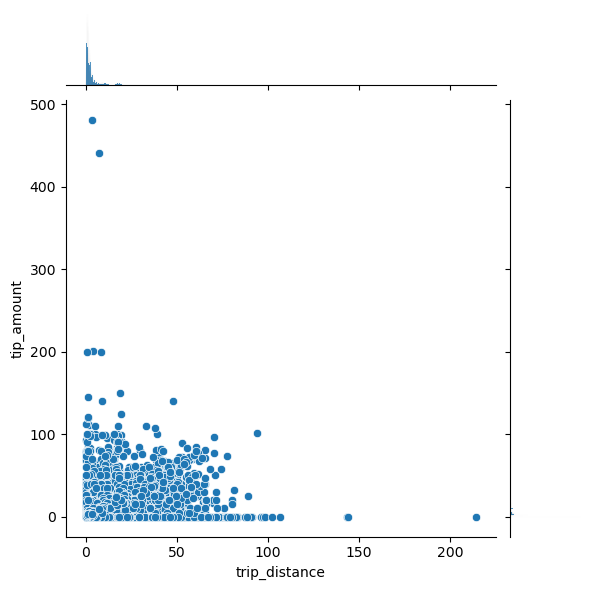

In [367]:
# Show relationship between tip and trip distance

sns.jointplot(x = df['trip_distance'], y = df['tip_amount'])
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

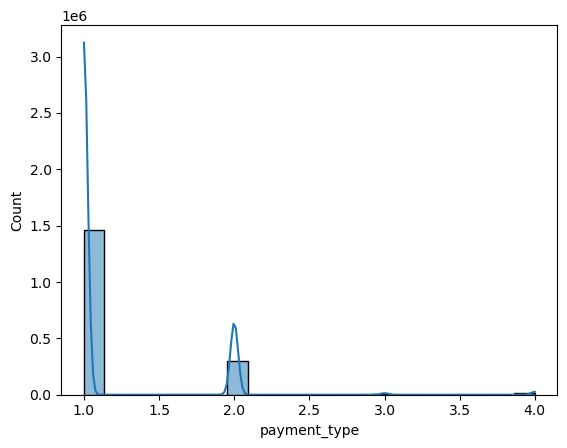

In [373]:
# Analyse the distribution of different payment types (payment_type).

sns.histplot(df['payment_type'],kde = True)
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [106]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.2 MB/s eta 0:00:00a 0:00:01


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [110]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/Users/satishkumar/Desktop/Datasets and Dictionary/taxi_zones/taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

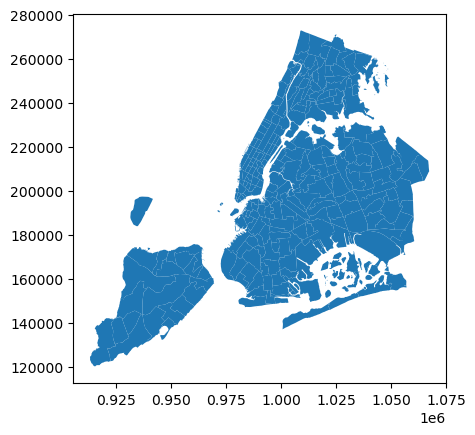

In [114]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [125]:
# Merge zones and trip records using locationID and PULocationID

merged_data = pd.merge(df,zones,left_on='PULocationID', right_on='LocationID',how='inner')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766555 entries, 0 to 1766554
Data columns (total 32 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [147]:
merged_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-30 23:58:35   2023-12-01 00:11:21              1.0   
1         2  2023-11-30 23:58:12   2023-12-01 00:06:58              1.0   
2         1  2023-12-02 16:52:21   2023-12-02 17:09:00              1.0   
3         1  2023-12-02 23:10:22   2023-12-02 23:32:29              1.0   
4         1  2023-12-02 21:24:02   2023-12-02 22:02:09              3.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.14         1.0                  N           163           263   
1           1.31         1.0                  N           163           162   
2           3.70         1.0                  N           263           137   
3           0.80         1.0                  N            48           230   
4           4.40         1.0                  N           249           141   

   payment_type  ...  tpep_pickup_day  tpep_pickup_month  tpep_pickup_quarter  \
0             1  ...               30                 11                    4   
1             1  ...               30                 11                    4   
2             1  ...                2                 12                    4   
3             1  ...                2                 12                    4   
4             1  ...                2                 12                    4   

   OBJECTID  Shape_Leng  Shape_Area            zone  LocationID    borough  \
0       163    0.034177    0.000041   Midtown North         163  Manhattan   
1       163    0.034177    0.000041   Midtown North         163  Manhattan   
2       263    0.037017    0.000066  Yorkville West         263  Manhattan   
3        48    0.043747    0.000094    Clinton East          48  Manhattan   
4       249    0.036384    0.000072    West Village         249  Manhattan   

                                            geometry  
0  POLYGON ((989412.663 219020.943, 990045.841 21...  
1  POLYGON ((989412.663 219020.943, 990045.841 21...  
2  POLYGON ((997493.323 220912.386, 997355.264 22...  
3  POLYGON ((986694.313 214463.846, 986568.184 21...  
4  POLYGON ((983555.319 204876.901, 983469.158 20...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [133]:
# Group data by location and calculate the number of trips

gp = merged_data.groupby('LocationID')['LocationID'].count().reset_index(name='no_trips')
gp

LocationID  no_trips
0             1        85
1             2         3
2             3        32
3             4      1171
4             5        19
..          ...       ...
246         259        41
247         260       274
248         261      9554
249         262     20955
250         263     32737

[251 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [135]:
# Merge trip counts back to the zones GeoDataFrame

zones = pd.merge(zones,gp,on = 'LocationID',how='inner')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  no_trips  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...        85  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...         3  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...        32  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...      1171  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...        19

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

TypeError: Legend.__init__() got an unexpected keyword argument 'label'

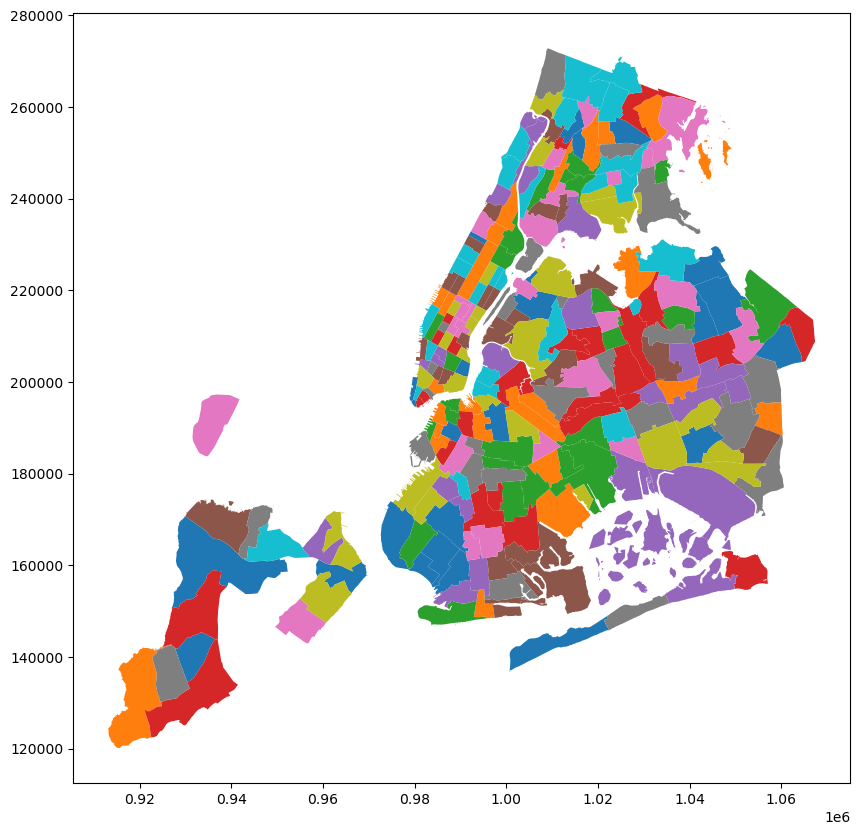

In [141]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it

zones.plot(column = 'zone',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"})

plt.show()

In [143]:
# can you try displaying the zones DF sorted by the number of trips?

zones.sort_values(by='no_trips', ascending=False)

OBJECTID  Shape_Leng  Shape_Area                      zone  LocationID  \
124       132    0.245479    0.002038               JFK Airport         132   
153       161    0.035804    0.000072            Midtown Center         161   
226       237    0.042213    0.000096     Upper East Side South         237   
225       236    0.044252    0.000103     Upper East Side North         236   
130       138    0.107467    0.000537         LaGuardia Airport         138   
..        ...         ...         ...                       ...         ...   
194       204    0.101912    0.000641         Rossville/Woodrow         204   
203       214    0.135300    0.000812  South Beach/Dongan Hills         214   
104       111    0.059931    0.000209       Green-Wood Cemetery         111   
210       221    0.166218    0.000890                 Stapleton         221   
97         99    0.183371    0.001210           Freshkills Park          99   

           borough                                           geometry  \
124         Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
153      Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
226      Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
225      Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
130         Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
..             ...                                                ...   
194  Staten Island  POLYGON ((927766.539 141772.465, 927864.475 14...   
203  Staten Island  POLYGON ((960669.201 156319.132, 960902.551 15...   
104       Brooklyn  POLYGON ((985590.381 179611.82, 986202.162 179...   
210  Staten Island  POLYGON ((963349.728 171627.581, 963397.759 17...   
97   Staten Island  POLYGON ((937468.341 152998.406, 937320.263 15...   

     no_trips  
124     97383  
153     89794  
226     87451  
225     74086  
130     66822  
..        ...  
194         1  
203         1  
104         1  
210         1  
97          1  

[252 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [209]:
# Find routes which have the slowest speeds at different times of the day


#df['tpep_drop_Hour'] = df['tpep_dropoff_datetime'].dt.hour
#df['time_difference'] = df['tpep_dropoff_datetime']- df['tpep_pickup_datetime']
#df['time_difference_hours'] = df['time_difference'].dt.total_seconds() / 3600
#df['speed_in_route'] = df['trip_distance']/df['time_difference_hours']
df.sort_values(by='speed_in_route', ascending=True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
724058          1  2023-07-10 12:28:00   2023-07-10 11:59:01              1.0   
2662658         1  2023-08-31 09:15:00   2023-08-31 08:47:51              1.0   
1914190         1  2023-08-22 15:36:00   2023-08-22 15:11:12              1.0   
493745          2  2023-11-05 01:59:42   2023-11-05 01:11:24              1.0   
488517          1  2023-11-05 01:58:36   2023-11-05 01:06:31              1.0   
...           ...                  ...                   ...              ...   
2715969         1  2023-06-26 06:03:02   2023-06-26 06:03:02              2.0   
2839395         1  2023-06-27 12:36:32   2023-06-27 12:36:32              2.0   
2916559         1  2023-06-28 05:50:47   2023-06-28 05:50:47              1.0   
3083506         1  2023-06-29 18:56:59   2023-06-29 18:56:59              1.0   
3091026         1  2023-06-29 19:36:50   2023-06-29 19:36:50              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
724058            8.40        99.0                  N           233   
2662658           1.00        99.0                  N            75   
1914190           0.80        99.0                  N           197   
493745            1.24         1.0                  N           114   
488517            1.30         1.0                  N           114   
...                ...         ...                ...           ...   
2715969           0.00         1.0                  N           161   
2839395           0.00         1.0                  N           162   
2916559           0.00         1.0                  N           193   
3083506           0.00         5.0                  N           265   
3091026           0.00         2.0                  Y           140   

         DOLocationID  payment_type  ...  Airport_fee  airport_fee  Air_fee  \
724058            135             1  ...          0.0          NaN      0.0   
2662658            74             1  ...          0.0          NaN      0.0   
1914190           216             1  ...          0.0          NaN      0.0   
493745            158             1  ...          0.0          NaN      0.0   
488517            170             1  ...          0.0          NaN      0.0   
...               ...           ...  ...          ...          ...      ...   
2715969           264             2  ...          0.0          NaN      0.0   
2839395           264             2  ...          0.0          NaN      0.0   
2916559           264             2  ...          0.0          NaN      0.0   
3083506           264             2  ...          0.0          NaN      0.0   
3091026           264             2  ...          0.0          NaN      0.0   

         tpep_pickup_Hour  tpep_pickup_day  tpep_pickup_month  \
724058                 12               10                  7   
2662658                 9               31                  8   
1914190                15               22                  8   
493745                  1                5                 11   
488517                  1                5                 11   
...                   ...              ...                ...   
2715969                 6               26                  6   
2839395                12               27                  6   
2916559                 5               28                  6   
3083506                18               29                  6   
3091026                19               29                  6   

         tpep_pickup_quarter   time_difference  time_difference_hours  \
724058                     3 -1 days +23:31:01              -0.483056   
2662658                    3 -1 days +23:32:51              -0.452500   
1914190                    3 -1 days +23:35:12              -0.413333   
493745                     4 -1 days +23:11:42              -0.805000   
488517                     4 -1 days +23:07:55              -0.868056   
...            

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

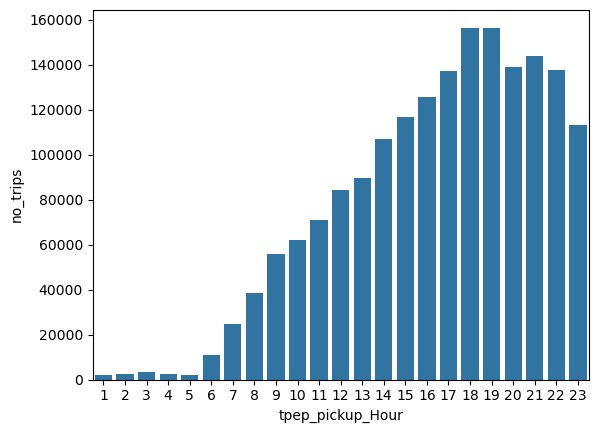

In [231]:
# Visualise the number of trips per hour and find the busiest hour

pu = df.groupby('tpep_pickup_Hour')['tpep_pickup_Hour'].count().reset_index(name='no_trips')
#pu

sns.barplot(x = pu['tpep_pickup_Hour'], y = pu['no_trips'])
plt.show()

In [561]:
df.groupby('tpep_pickup_Hour')['tpep_pickup_Hour'].count().reset_index(name='no_trips').sort_values(by='no_trips', ascending=False)



tpep_pickup_Hour  no_trips
18                19    156523
17                18    156144
20                21    143816
19                20    139081
21                22    137774
16                17    137414
15                16    125577
14                15    116578
22                23    112999
13                14    107120
12                13     89742
11                12     84162
10                11     70915
9                 10     61968
8                  9     55816
7                  8     38501
6                  7     24793
5                  6     10764
2                  3      3236
1                  2      2679
3                  4      2406
4                  5      2251
0                  1      2049

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [235]:
# Compare traffic trends for the week days and weekends

df['Weekday_or_ weekend']= df['tpep_pickup_datetime'].dt.weekday


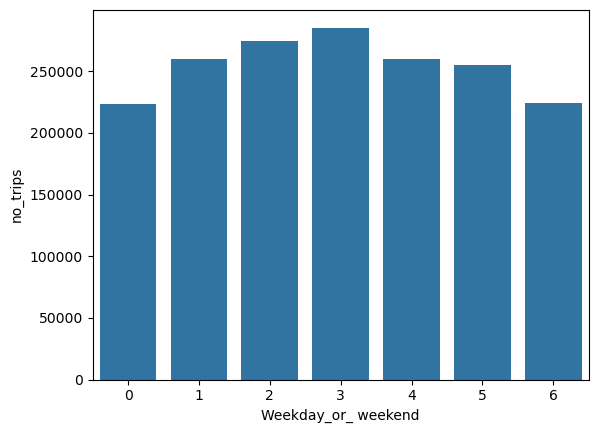

In [243]:
pu = df.groupby('Weekday_or_ weekend')['tpep_pickup_Hour'].count().reset_index(name='no_trips')
pu
sns.barplot(x = (pu['Weekday_or_ weekend']), y = pu['no_trips'])
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [277]:
# Find top 10 pickup and dropoff zones
#df['tpep_dropoff_Hour'] = df['tpep_dropoff_datetime'].dt.hour

st = df.groupby('PULocationID')['tpep_pickup_Hour'].count().reset_index(name='count_pick')

st.sort_values(by='count_pick', ascending=False).head(10)

PULocationID  count_pick
124           132       97383
153           161       89794
226           237       87451
225           236       74086
130           138       66822
154           162       66051
134           142       63774
219           230       61390
177           186       59898
155           163       55312

In [287]:
pt = df.groupby('DOLocationID')['tpep_dropoff_Hour'].count().reset_index(name='count_drop')

pt.sort_values(by='count_drop', ascending=False).head(10)

DOLocationID  count_drop
230           236       81169
231           237       76042
156           161       64495
224           230       55164
233           239       52770
165           170       52405
137           142       52121
136           141       49523
157           162       48615
47             48       44865

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [295]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

#Dropoff
val_high  = pt.sort_values(by='count_drop', ascending=False).head(10)
val_low = pt.sort_values(by='count_drop', ascending=False).tail(10)

ratio_drop = val_high['count_drop'].sum() / val_low['count_drop'].sum()

ratio_drop

4850.1596638655465

In [299]:
#Pickup
val_high  = st.sort_values(by='count_pick', ascending=False).head(10)
val_low = st.sort_values(by='count_pick', ascending=False).tail(10)

ratio_pick = val_high['count_pick'].sum() / val_low['count_pick'].sum()

ratio_pick

65632.81818181818

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [327]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df_night_pick = df[df['tpep_pickup_Hour'].isin([23,1,2,3,4,5])]
df_night_drop = df[df['tpep_dropoff_Hour'].isin([23,1,2,3,4,5])]

df_night_drop.groupby('DOLocationID')['tpep_dropoff_Hour'].count().reset_index(name='count_drop').sort_values(by='count_drop', ascending=False).head(10)

DOLocationID  count_drop
77             79        4455
47             48        3933
163           170        3863
134           141        3629
228           236        3571
255           263        3341
102           107        3244
66             68        3228
231           239        3123
222           230        3081

In [329]:
df_night_drop.groupby('PULocationID')['tpep_pickup_Hour'].count().reset_index(name='count_drop').sort_values(by='count_drop', ascending=False).head(10)

PULocationID  count_drop
100           132       10860
63             79        6622
197           249        6130
181           230        5898
106           138        5578
36             48        5564
110           142        5188
126           161        5063
145           186        4474
185           234        3912

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [331]:
# Filter for night hours (11 PM to 5 AM)
df_night_pick = df[df['tpep_pickup_Hour'].isin([23,1,2,3,4,5])]
df_night_drop = df[df['tpep_dropoff_Hour'].isin([23,1,2,3,4,5])]


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

/var/folders/f2/nhm06d1x0rj9gb0_43b6bnsc0000gn/T/ipykernel_15429/3338051835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf['Avg_fare_per_mile'] = tf['total_amount']/tf['passenger_count']


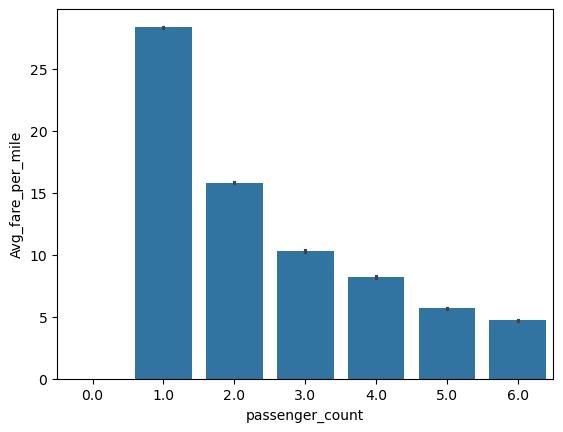

In [353]:
# Analyse the fare per mile per passenger for different passenger counts

tf = df[['total_amount','passenger_count','trip_distance']]

tf['Avg_fare_per_mile'] = tf['total_amount']/tf['passenger_count']
#tf.head()
tf = tf.reset_index(drop=True)
sns.barplot(x = (tf['passenger_count']), y = tf['Avg_fare_per_mile'])
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

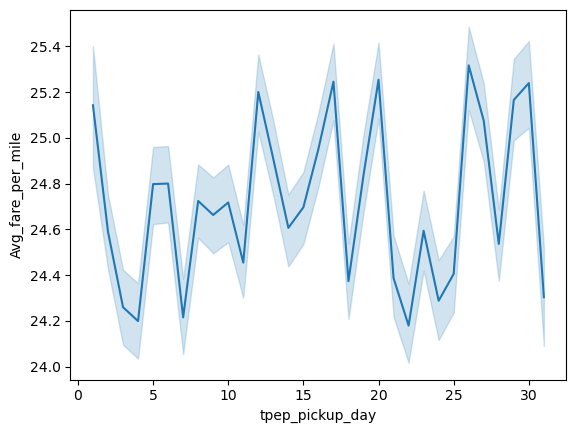

In [371]:
# Compare the average fare per mile for different days and for different times of the day

#df['Avg_fare_per_mile'] = df['total_amount']/df['passenger_count']
#df = df.reset_index(drop=True)
#sns.scatterplot(data = df,x= 'tpep_pickup_day',y='Avg_fare_per_mile')
#plt.show()

sns.lineplot(x= 'tpep_pickup_day',y='Avg_fare_per_mile', data=df) 
plt.show()

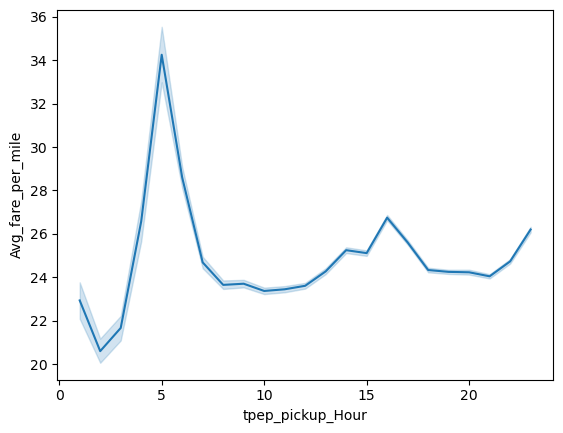

In [373]:
	
sns.lineplot(x= 'tpep_pickup_Hour',y='Avg_fare_per_mile', data=df) 
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

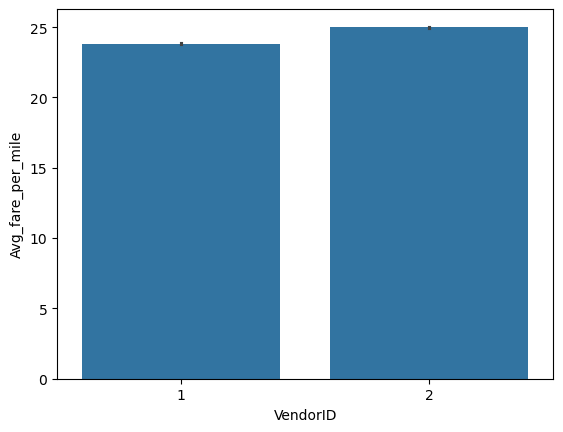

In [381]:
# Compare fare per mile for different vendors

sns.barplot(x = (df['VendorID']), y = tf['Avg_fare_per_mile'])
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [389]:
# Defining distance tiers

pt = df[df['trip_distance']<2]
lt = df[(df['trip_distance']>2) & (df['trip_distance']<5)]
rt = pt = df[df['trip_distance']>5]

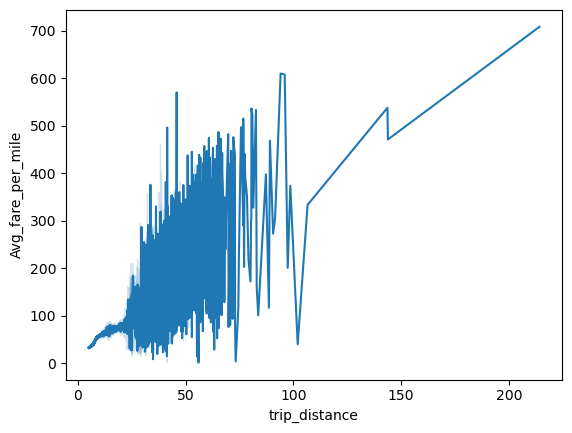

In [391]:
sns.lineplot(x= 'trip_distance',y='Avg_fare_per_mile', data=pt) 
plt.show()

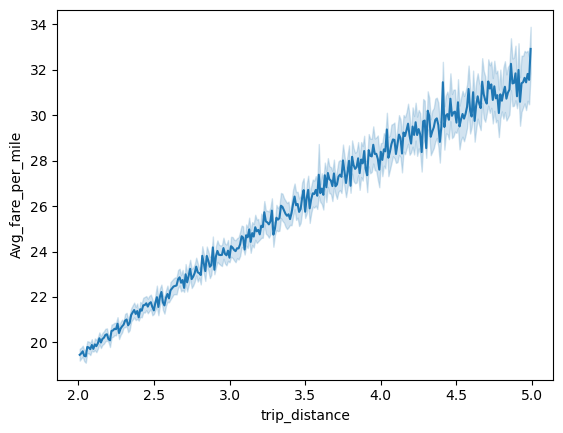

In [395]:
sns.lineplot(x= 'trip_distance',y='Avg_fare_per_mile', data=lt) 
plt.show()

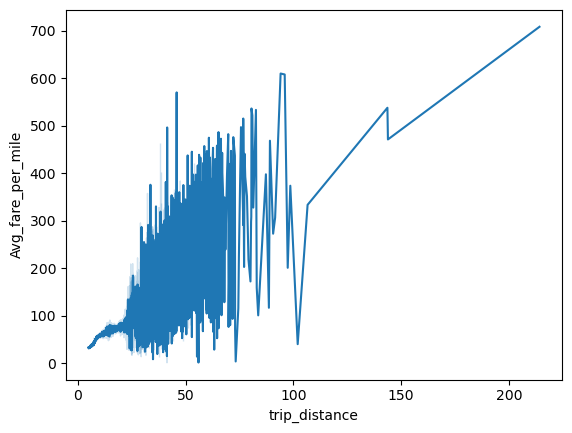

In [397]:
sns.lineplot(x= 'trip_distance',y='Avg_fare_per_mile', data=rt) 
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

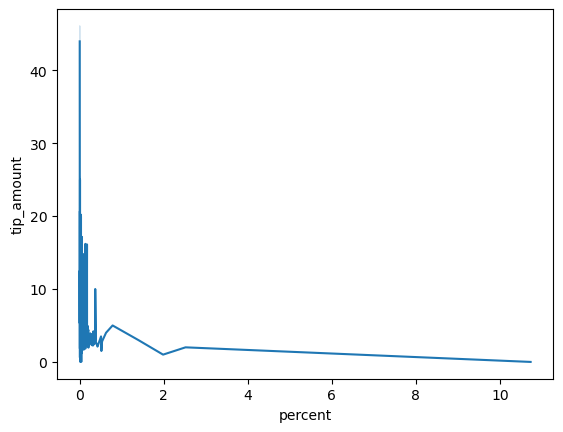

In [421]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
pt = df[['tip_amount','trip_distance','passenger_count','tpep_pickup_Hour']]

val = pt['tip_amount'].value_counts()
length = len(pt)-- 1782308

dt = ((val/length)*100).reset_index(name='percent')
dt.head()

sns.lineplot(x= 'percent',y='tip_amount', data=dt) 
plt.show()

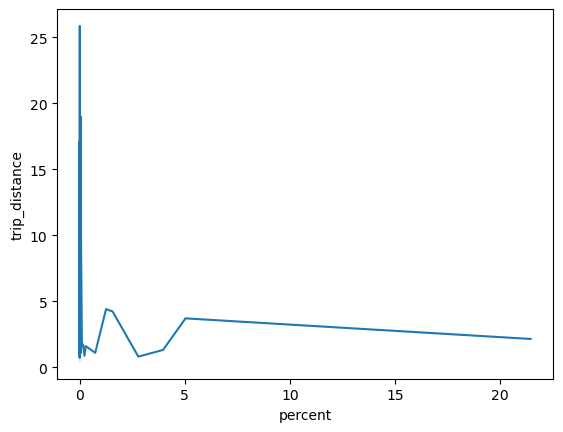

In [433]:
pt['percent'] = ((pt['tip_amount'].value_counts())/len(pt))*100
sns.lineplot(x= 'percent',y='trip_distance', data=pt) 
plt.show()

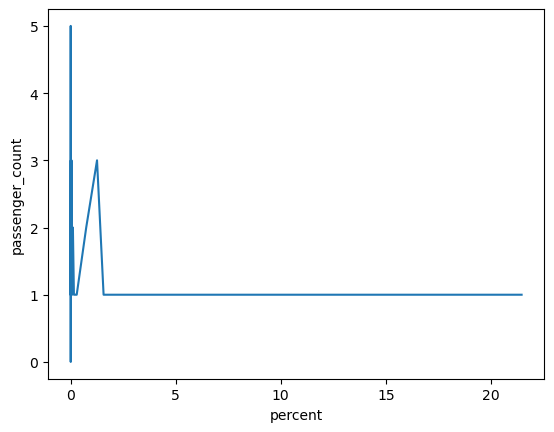

In [435]:
sns.lineplot(x= 'percent',y='passenger_count', data=pt) 
plt.show()

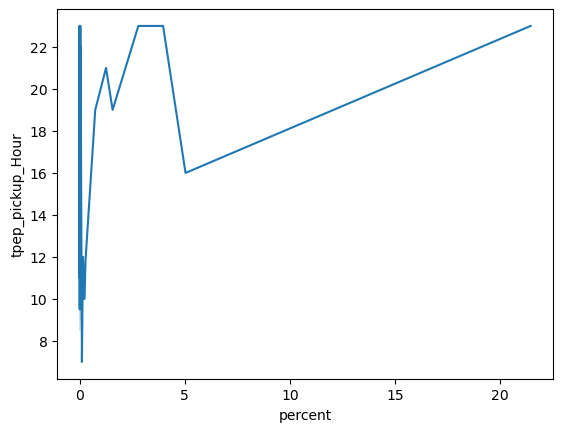

In [437]:
sns.lineplot(x= 'percent',y='tpep_pickup_Hour', data=pt) 
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

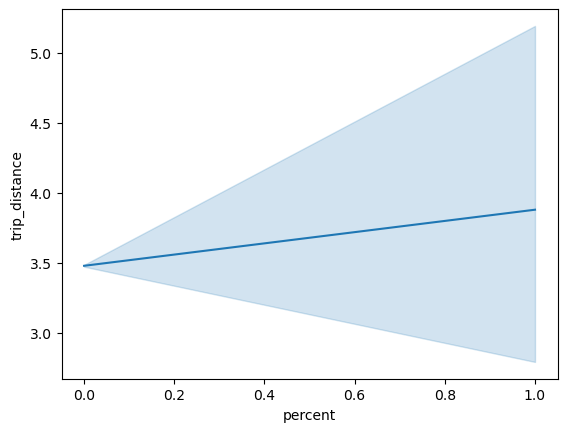

In [451]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

#pt[pt['percent']<10]

sns.lineplot(x= pt['percent']<10,y= pt['trip_distance'], data=pt) 
plt.show()

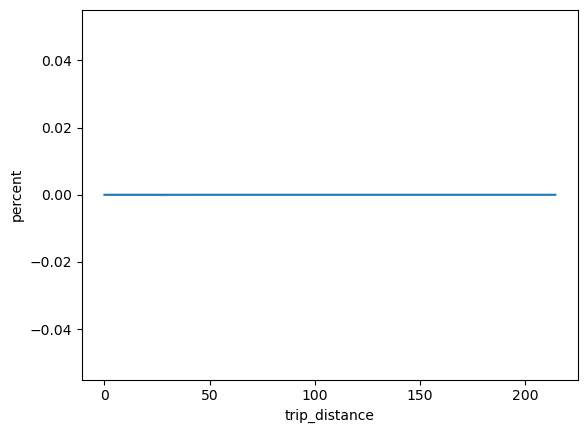

In [455]:
sns.lineplot(y= pt['percent']>25,x= pt['trip_distance'], data=pt) 
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

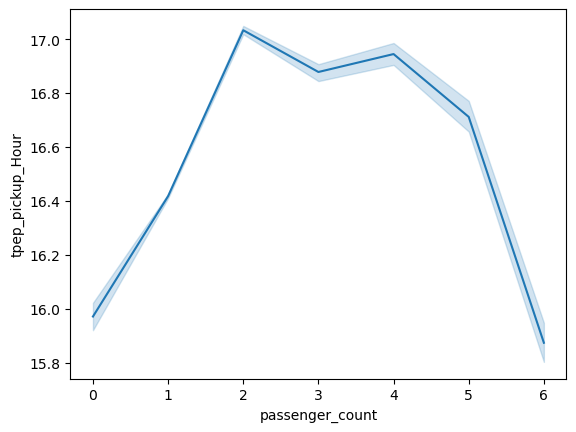

In [461]:
# See how passenger count varies across hours and days

sns.lineplot(data= df,x='passenger_count',y = 'tpep_pickup_Hour')
plt.show()


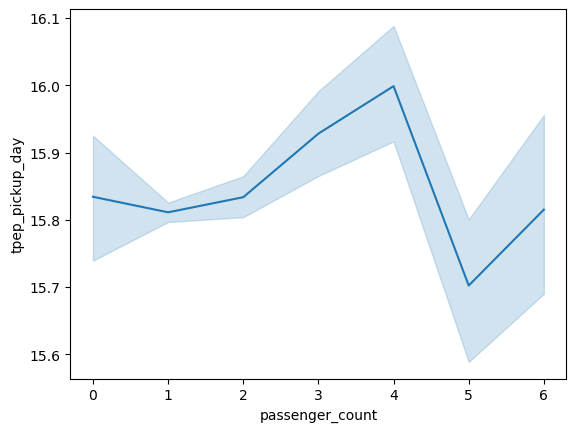

In [463]:
sns.lineplot(data= df,x='passenger_count',y = 'tpep_pickup_day')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

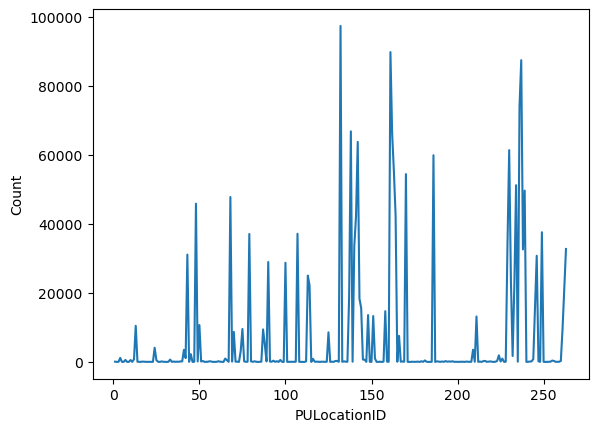

In [494]:
# How does passenger count vary across zones

#merged_data.head()

yt= merged_data.groupby('PULocationID')['passenger_count'].count().reset_index(name='Count')

sns.lineplot(data= yt,x='PULocationID',y = 'Count')
plt.show()

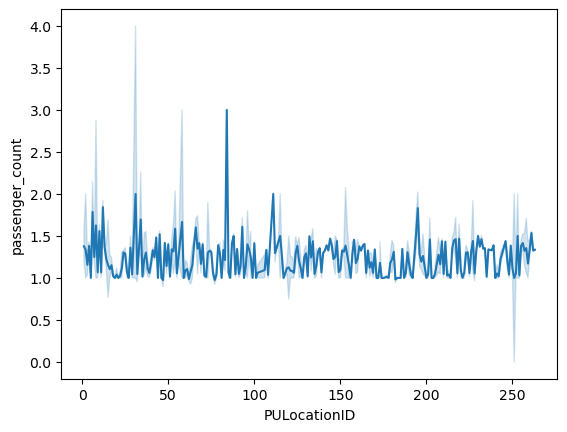

In [504]:
sns.lineplot(data= merged_data,x='PULocationID',y = 'passenger_count')
plt.show()

In [508]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

df['Avg_pass_zone']= df.groupby('PULocationID')['passenger_count'].count()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [536]:
# How often is each surcharge applied?

# Least Occurances Surcharge is APPLIED



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.